In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, ComplementNB, ClassifierMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:

X_train = pd.read_csv('TinyMNIST/trainData.csv', header = None)
y_train = pd.read_csv('TinyMNIST/trainLabels.csv', header = None).values.flatten()
X_test = pd.read_csv('TinyMNIST/testData.csv', header = None)
y_test = pd.read_csv('TinyMNIST/testLabels.csv', header = None).values.flatten()

In [3]:
class PCA:
    def __init__(self, X):
        n, m = X.shape
        self.U, self.S, _ = np.linalg.svd(X)
        self.Lambda = (self.S**2) / (n - 1)
    def get_PCs(self, k):
        return (self.U[:,:k] @ np.diag(self.S)[:k,:k])

In [4]:
X = pd.concat([X_train, X_test])
pca = PCA(X)

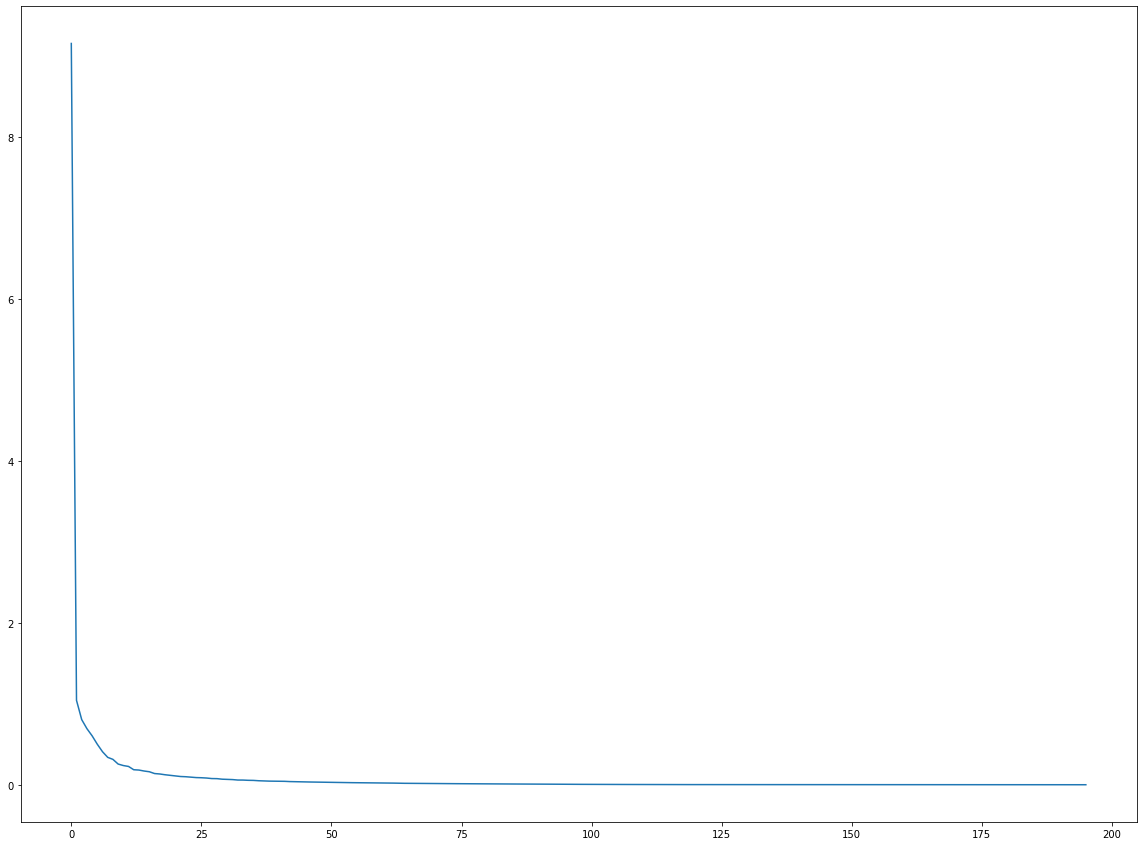

In [5]:
plt.figure(figsize = (20, 15))
plt.plot(pca.Lambda)

In [6]:
scores = [0]
for k in range(1, 51):
    X_pca = pca.get_PCs(k)
    X_pca_train = X_pca[:len(X_train)]
    X_pca_test = X_pca[len(X_train):]

    clf = KNeighborsClassifier()
    clf = clf.fit(X_pca_train, y_train)
    scores.append(clf.score(X_pca_test, y_test))

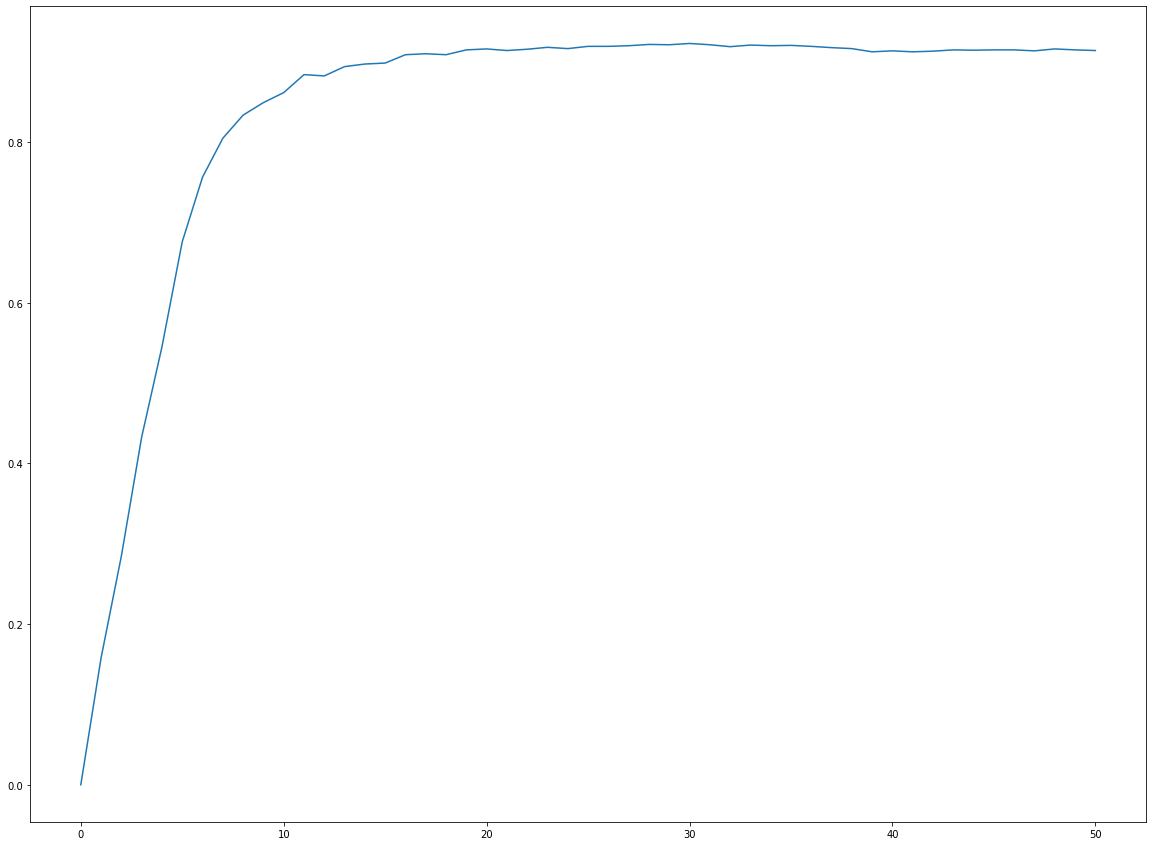

In [7]:
plt.figure(figsize = (20, 15))
plt.plot(scores)

In [8]:
train_idx = np.random.choice(range(len(X_train)), 1500, replace=False)
X_train_small = X_train.loc[train_idx].reset_index(drop=True)
y_train_small = y_train[train_idx]

test_idx = np.random.choice(range(len(X_test)), 400, replace=False)
X_test_small = X_test.loc[test_idx].reset_index(drop=True)
y_test_small = y_test[test_idx]

X_small = pd.concat([X_train_small, X_test_small])
pca = PCA(X_small)

In [9]:
def gaus_window(u):
    return (2*np.pi)**(-1/2) * np.exp(-0.5 * ((u**2).sum()))

def parzen_gaus(X_train, y_train, X_test, y_test):
    X_train_cls = [X_train[y_train == i] for i in range(10)]
    D = X_train.shape[1]
    cls_n = np.array(list(map(lambda x: len(x), X_train_cls)))
    priors = cls_n / np.sum(cls_n)
    h1 = 3
    hn = h1 / cls_n**.5
    Vn_1 = 1 / hn**D
    predicts = []
    for t in range(len(X_test)):
        post_prob = []
        for i in range(10):
            u = (X_train_cls[i].values - X_test.loc[t].values)/hn[i]
            phi = np.sum(list(map(gaus_window, u)))
            post_prob.append((1/cls_n[i]) * Vn_1[i] * phi)
        predicts.append(np.argmax(post_prob))
    return (predicts == y_test).mean()


In [11]:
parzen_gaus(X_train_small, y_train_small, X_test_small, y_test_small)

0.8375

In [12]:
scores = [0]
for k in range(1, 30):
    X_pca = pd.DataFrame(pca.get_PCs(k))
    X_pca_train = X_pca[:len(X_train_small)]
    X_pca_test = X_pca[len(X_train_small):].reset_index(drop=True)

    print(k, parzen_gaus(X_pca_train, y_train_small, X_pca_test, y_test_small))
    

1 0.1825
2 0.315
3 0.465
4 0.595
5 0.6475
6 0.7
7 0.7425
8 0.7725
9 0.795
10 0.815
11 0.8325
12 0.825
13 0.8225
14 0.8275
15 0.825
16 0.84
17 0.84
18 0.85
19 0.85
20 0.8475
21 0.865
22 0.865
23 0.8725
24 0.8675
25 0.8725
26 0.87
27 0.8775
28 0.8825
29 0.88


In [28]:
def rect_window(u):
    return (np.abs(u) <= .5).all()

def parzen_rect(X_train, y_train, X_test, y_test):
    X_train_cls = [X_train[y_train == i] for i in range(10)]
    D = X_train.shape[1]
    cls_n = np.array(list(map(lambda x: len(x), X_train_cls)))
    priors = cls_n / np.sum(cls_n)
    unit = 1.8
    Vn_1 = 1 / unit**D
    predicts = []
    for t in range(len(X_test)):
        post_prob = []
        for i in range(10):
            u = (X_train_cls[i].values - X_test.loc[t].values)/unit
            phi = np.sum(list(map(rect_window, u)))
            post_prob.append((1/cls_n[i]) * Vn_1 * phi)
        predicts.append(np.argmax(post_prob))
    return (predicts == y_test).mean()


In [29]:
parzen_rect(X_train_small, y_train_small, X_test_small, y_test_small)

0.7275

In [30]:
scores = [0]
for k in range(1, 50):
    X_pca = pd.DataFrame(pca.get_PCs(k))
    X_pca_train = X_pca[:len(X_train_small)]
    X_pca_test = X_pca[len(X_train_small):].reset_index(drop=True)

    print(k, parzen_rect(X_pca_train, y_train_small, X_pca_test, y_test_small))
    

1 0.1625
2 0.305
3 0.475
4 0.55
5 0.63
6 0.7225
7 0.755
8 0.77
9 0.795
10 0.7975
11 0.825
12 0.8075
13 0.8075
14 0.81
15 0.8125
16 0.8225
17 0.825
18 0.82
19 0.815
20 0.8175
21 0.8075
22 0.805
23 0.8025
24 0.8075
25 0.81
26 0.8075
27 0.8075
28 0.8075
29 0.8075
30 0.8075
31 0.81
32 0.8125
33 0.8125
34 0.8125
35 0.8075
36 0.8075
37 0.805
38 0.805
39 0.8025
40 0.8025
41 0.8025
42 0.8025
43 0.8025
44 0.8025
45 0.8025
46 0.8025
47 0.8025
48 0.8025
49 0.8025


In [38]:
from scipy.stats import mode

def KNN_nomral_predict(X_test, X_train, y_train, k=5):
    predicts = []
    for i, x in enumerate(X_test):
        kn_idx = np.argsort(np.sum((X_train - x)**2, axis=1))[:k]
        predicts.append(mode(y_train[kn_idx]).mode[0])
    return predicts

In [53]:
predicts = np.array(KNN_nomral_predict(X_test_small.values, X_train_small.values, y_train_small))
(predicts == y_test_small).mean()

0.88

In [54]:
scores = [0]
for k in range(1, 50):
    X_pca = pd.DataFrame(pca.get_PCs(k))
    X_pca_train = X_pca[:len(X_train_small)]
    X_pca_test = X_pca[len(X_train_small):].reset_index(drop=True)
    
    predicts = np.array(KNN_nomral_predict(X_pca_test.values, X_pca_train.values, y_train_small))
    print(k, (predicts == y_test_small).mean())
    

1 0.16
2 0.26
3 0.4875
4 0.56
5 0.6625
6 0.755
7 0.785
8 0.7975
9 0.8325
10 0.8425
11 0.88
12 0.8575
13 0.87
14 0.8725
15 0.865
16 0.87
17 0.875
18 0.8775
19 0.89
20 0.905
21 0.9075
22 0.8925
23 0.89
24 0.8875
25 0.9
26 0.895
27 0.885
28 0.8875
29 0.8975
30 0.895
31 0.8925
32 0.895
33 0.895
34 0.89
35 0.89
36 0.8875
37 0.8925
38 0.885
39 0.8825
40 0.8875
41 0.8825
42 0.89
43 0.895
44 0.8975
45 0.8825
46 0.8875
47 0.8875
48 0.8875
49 0.8825
